<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_1%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/03%EA%B3%BC_2_%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5_carseat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀_실습_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [3]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [5]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [6]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [12]:
nfeature = x_train.shape[1]
nfeature

18

In [17]:
clear_session()
model1 = Sequential([Dense(1, input_shape=(nfeature, ))])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 19        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [18]:
model1.compile(optimizer=Adam(0.001), loss='mse')
hist = model1.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
8/8 [==============================] - 1s 38ms/step - loss: 56.8770 - val_loss: 54.1443
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 56.1221 - val_loss: 53.4482
Epoch 3/20
8/8 [==============================] - 0s 21ms/step - loss: 55.3834 - val_loss: 52.7540
Epoch 4/20
8/8 [==============================] - 0s 21ms/step - loss: 54.6370 - val_loss: 52.0725
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 53.9123 - val_loss: 51.3927
Epoch 6/20
8/8 [==============================] - 0s 17ms/step - loss: 53.1954 - val_loss: 50.7189
Epoch 7/20
8/8 [==============================] - 0s 26ms/step - loss: 52.4788 - val_loss: 50.0550
Epoch 8/20
8/8 [==============================] - 0s 14ms/step - loss: 51.7736 - val_loss: 49.3995
Epoch 9/20
8/8 [==============================] - 0s 13ms/step - loss: 51.0816 - val_loss: 48.7488
Epoch 10/20
8/8 [==============================] - 0s 12ms/step - loss: 50.3822 - val_loss: 48.1146
Epoch 11/

* 학습곡선

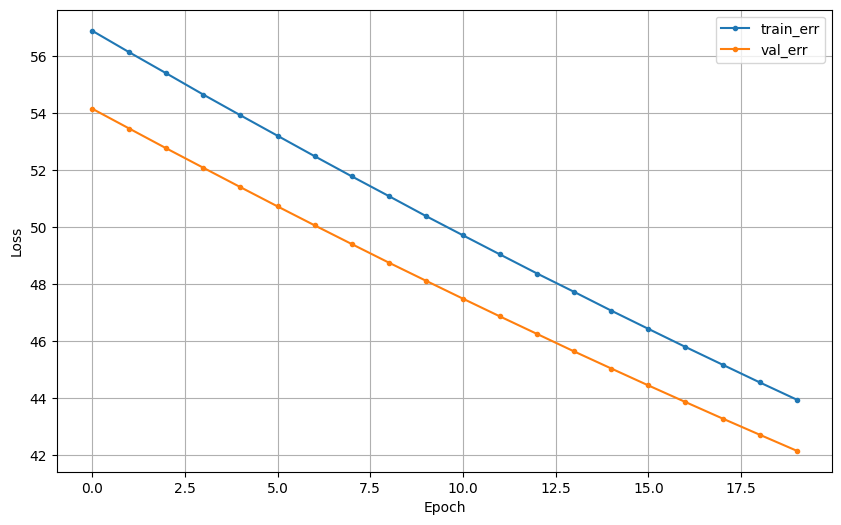

In [19]:
dl_history_plot(hist)

* 검증

In [20]:
pred = model1.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 9ms/step
RMSE: 41.15651468749719
MAE: 5.723876590430737
MAPE: 5.723876590430737


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [23]:
clear_session()
model2 = Sequential([Dense(9, input_shape=(nfeature,), activation='relu'),
                     Dense(1)])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [24]:
model2.compile(optimizer=Adam(0.01), loss='mse')
hist = model2.fit(x_train, y_train, epochs=20, validation_split=0.2).history

Epoch 1/20
8/8 [==============================] - 1s 27ms/step - loss: 60.1006 - val_loss: 49.7352
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 47.9327 - val_loss: 36.1064
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 32.1186 - val_loss: 21.6291
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 17.9443 - val_loss: 11.8022
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 9.8068 - val_loss: 9.3640
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 8.4967 - val_loss: 10.6631
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 8.3654 - val_loss: 10.1298
Epoch 8/20
8/8 [==============================] - 0s 9ms/step - loss: 7.6782 - val_loss: 9.2312
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 7.1495 - val_loss: 8.8048
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 6.9754 - val_loss: 8.5884
Epoch 11/20
8/8 [===========

* 학습곡선

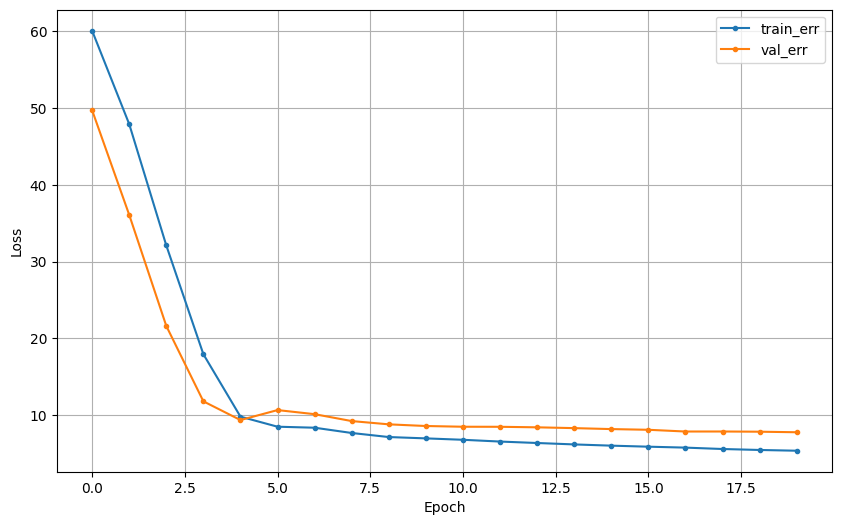

In [25]:
dl_history_plot(hist)

* 검증

In [26]:
pred = model1.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 7ms/step
RMSE: 41.15651468749719
MAE: 5.723876590430737
MAPE: 5.723876590430737


### (3) 모델3

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [44]:
clear_session()
model3 = Sequential([Dense(12, input_shape=(nfeature, ), activation='relu'),
                     Dense(6, activation='relu'),
                     Dense(3, activation='relu'),
                     Dense(1)])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                228       
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [45]:
model3.compile(optimizer=Adam(0.1), loss='mse')
hist = model3.fit(x_train, y_train, epochs=25, validation_split=0.2).history

Epoch 1/25
8/8 [==============================] - 2s 45ms/step - loss: 29.5669 - val_loss: 21.6932
Epoch 2/25
8/8 [==============================] - 0s 13ms/step - loss: 14.2043 - val_loss: 9.8578
Epoch 3/25
8/8 [==============================] - 0s 14ms/step - loss: 5.0173 - val_loss: 6.3646
Epoch 4/25
8/8 [==============================] - 0s 14ms/step - loss: 4.5311 - val_loss: 6.5576
Epoch 5/25
8/8 [==============================] - 0s 13ms/step - loss: 4.0970 - val_loss: 5.6069
Epoch 6/25
8/8 [==============================] - 0s 10ms/step - loss: 3.9387 - val_loss: 6.1895
Epoch 7/25
8/8 [==============================] - 0s 9ms/step - loss: 3.8589 - val_loss: 5.0388
Epoch 8/25
8/8 [==============================] - 0s 6ms/step - loss: 3.7523 - val_loss: 5.4871
Epoch 9/25
8/8 [==============================] - 0s 8ms/step - loss: 3.3757 - val_loss: 5.1495
Epoch 10/25
8/8 [==============================] - 0s 9ms/step - loss: 3.2723 - val_loss: 4.2584
Epoch 11/25
8/8 [=============

* 학습곡선

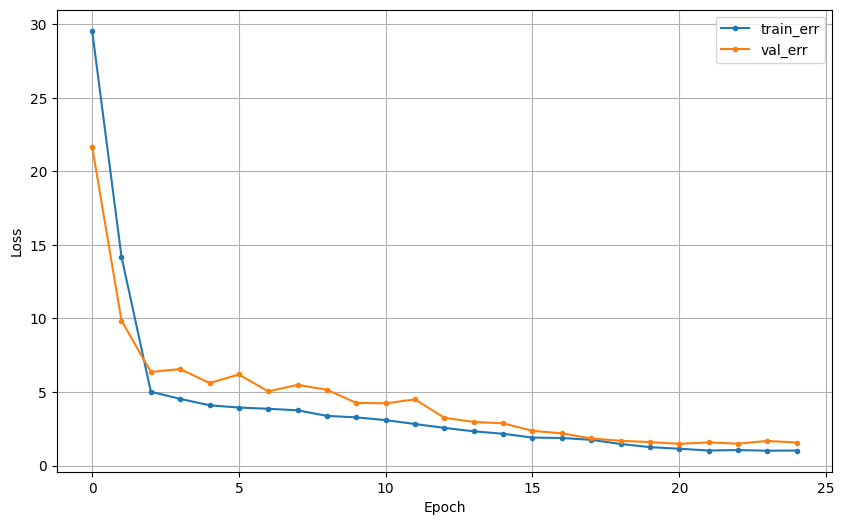

In [46]:
dl_history_plot(hist)

* 검증

In [47]:
pred = model1.predict(x_val)
print('RMSE:', mean_squared_error(y_val, pred))
print('MAE:', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_error(y_val, pred))

3/3 [==============================] - 0s 4ms/step
RMSE: 41.15651468749719
MAE: 5.723876590430737
MAPE: 5.723876590430737
